# **Reporte Final: "El Precio de los Autos"**

# **Resumen de la problemática**

Para este entregable se plantea el problema de una empresa automovilística china que se enfrenta al desafío de ingresar al mercado estadounidense y competir con sus contrapartes locales y europeas. Para abordar esta problemática, se realizó un análisis exhaustivo de los factores que influyen en el precio de los automóviles en el mercado estadounidense. Se utilizaron métodos y técnicas estadísticas, incluyendo la regresión lineal múltiple y la imputación de datos faltantes utilizando el paquete "mice" en R.

Los resultados clave del análisis son los siguientes:

* Se identificaron variables significativas que afectan el precio de los automóviles en el mercado estadounidense, incluyendo la categoría del automóvil, la recaudación mundial bruta, el porcentaje de presupuesto recuperado y otros factores relevantes.

* Se evaluó la capacidad de estas variables para describir el precio de los automóviles y se encontró que algunas variables tienen un impacto significativo en la predicción del precio, mientras que otras tienen una influencia limitada.

Este análisis proporciona a la empresa automovilística china una comprensión más profunda de los factores críticos que afectan el precio de los automóviles en el mercado estadounidense, lo que les permitirá tomar decisiones estratégicas informadas al ingresar a este mercado competitivo.

# **Introducción**

En una era de globalización, dónde la mayor parte de los mercados y negocios aspiran a expandir su presencia más allá de las fronteras, la industria automotriz se ha convertido en el claro ejemplo de una competición internacional de este calibre. Conforme los mercados han evolucionado y las preferencias de los consumidores por igual, las compañias automotrices han buscado adaptarse a los nuevos panoramas, especialmente cuando se trata de apuntar a mercados extranjeros. Este reporte busca profundizar en esta problemática crítica que encara una compañia automotriz china que aspira a establecerse en el altamente competitivo mercado estadounidense.

### **Abordamiento del problema**

La problemática en mano gira alrededor de una pregunta en cuestión de entender los determinantes de precios de los automóviles en el mercado estadounidense. Esta investigación asume primordial importancia en el cliente, la firma automotriz china, como busca competir con los mercados ya establecidos de América y Europa.

### **Relevancia de la problemática**
La situación esta subrayadada por las nada estables, dinámicas del mercado global. Para denotar su relevancia, es escencial considerar que la literatura creciente estrategias de entrada al mercado y las dinámicas de precios para negocios internacionales. Entre más nos adentremos en este reporte, emplearemos métodos estadísticos, analíticos y predictivos para decifrar la compleja interacción de factores que impactan el precio de los automóviles en losEstados Unidos.

In [1]:
# Montamos Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Cargamos el lenguaje de R para utilizarlo en Google Colab
%load_ext rpy2.ipython

In [3]:
# Obtenemos la ruta del archivo CSV a utilizar
file_path = '/content/drive/MyDrive/Colab Notebooks/Estadística/precios_autos.csv'

In [4]:
# Pasamos la variable de la ruta de los datos a R
%Rpush file_path

In [5]:
%%R

# Cargamos los datos de la base de datos
data <- read.csv(file_path)

In [ ]:
%%R

# Cargamos las librerías necesarias

install.packages('caret')
install.packages('ggplot2')
install.packages('dplyr')
install.packages('tidyr')
install.packages("knitr")
install.packages("corrplot")
install.packages('MASS')
install.packages('e1071')
install.packages('nortest')
install.packages('VGAM')


library(caret)
library(ggplot2)
library(dplyr)
library(tidyr)
library(knitr)
library(corrplot)
library(MASS)
library(e1071)
library(nortest)
library(VGAM)

# **Exploración de la Base de Datos**

## **Visualización de Variables Cuantitativas**

In [7]:
%%R

# Estadísticas descriptivas para las variables cuantitativas
quantitative_vars <- data %>% select_if(is.numeric)

# Generamos una tabla comparativa
summary_stats_table <- kable(summary(quantitative_vars), format = "markdown")

# Desplegamos la tabla
print(summary_stats_table)



|   |  symboling     |  wheelbase    |  carlength   |   carwidth   |  carheight   |  curbweight |  enginesize  |    stroke    |compressionratio |  horsepower  |   peakrpm   |   citympg    |  highwaympg  |    price     |
|:--|:---------------|:--------------|:-------------|:-------------|:-------------|:------------|:-------------|:-------------|:----------------|:-------------|:------------|:-------------|:-------------|:-------------|
|   |Min.   :-2.0000 |Min.   : 86.60 |Min.   :141.1 |Min.   :60.30 |Min.   :47.80 |Min.   :1488 |Min.   : 61.0 |Min.   :2.070 |Min.   : 7.00    |Min.   : 48.0 |Min.   :4150 |Min.   :13.00 |Min.   :16.00 |Min.   : 5118 |
|   |1st Qu.: 0.0000 |1st Qu.: 94.50 |1st Qu.:166.3 |1st Qu.:64.10 |1st Qu.:52.00 |1st Qu.:2145 |1st Qu.: 97.0 |1st Qu.:3.110 |1st Qu.: 8.60    |1st Qu.: 70.0 |1st Qu.:4800 |1st Qu.:19.00 |1st Qu.:25.00 |1st Qu.: 7788 |
|   |Median : 1.0000 |Median : 97.00 |Median :173.2 |Median :65.50 |Median :54.10 |Median :2414 |Median :120.0 |Median

### **Bloxplot y Valores Atípicos**
Representaremos los valores cuantitativos en forma de gráficas de caja y bigotes o *boxplots*, que nos permitirán conocer el rango en el cual se encuentra cada variable, la tendencia central y la variabilidad de los datos, así como visualizar los datos atípicos:

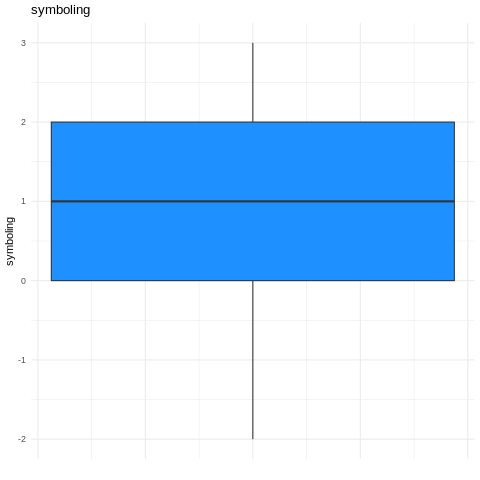

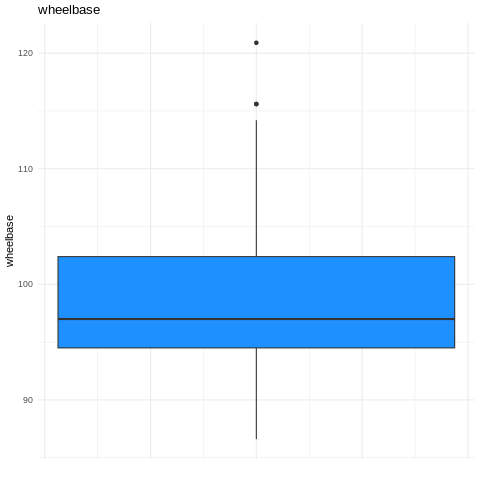

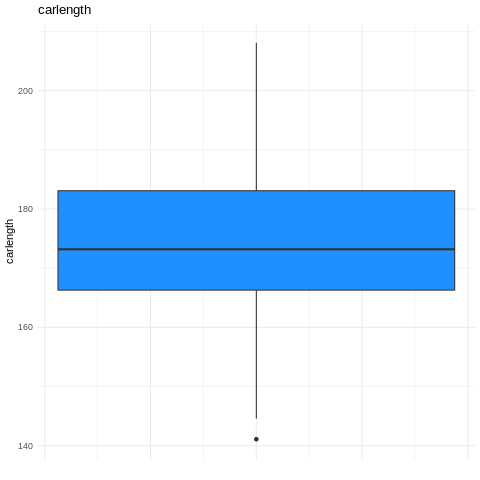

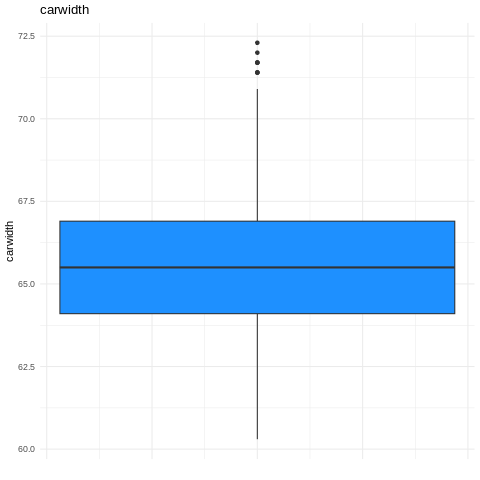

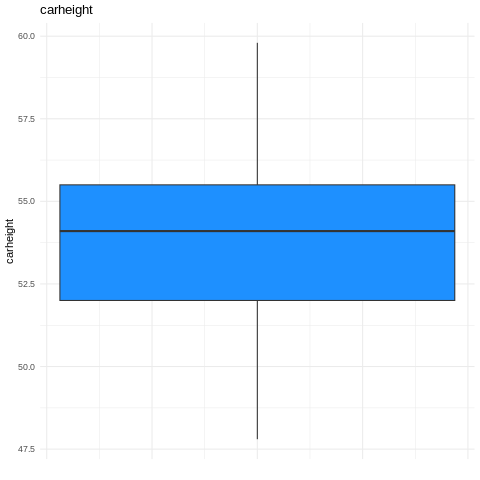

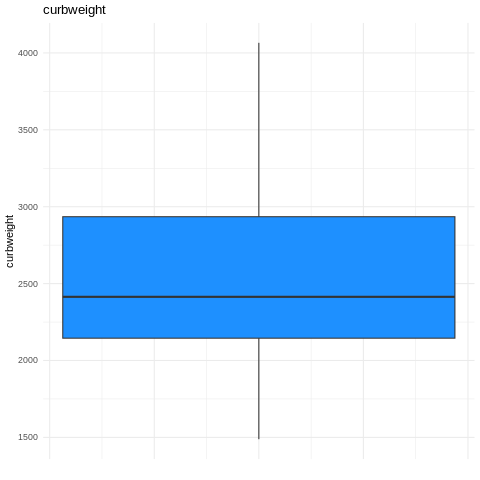

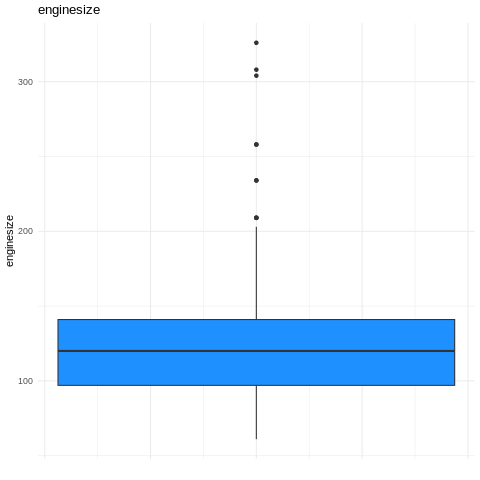

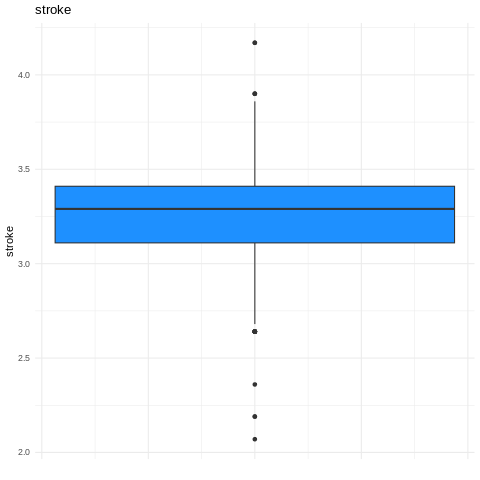

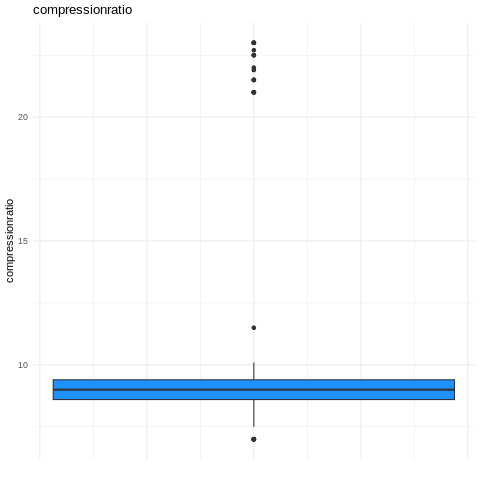

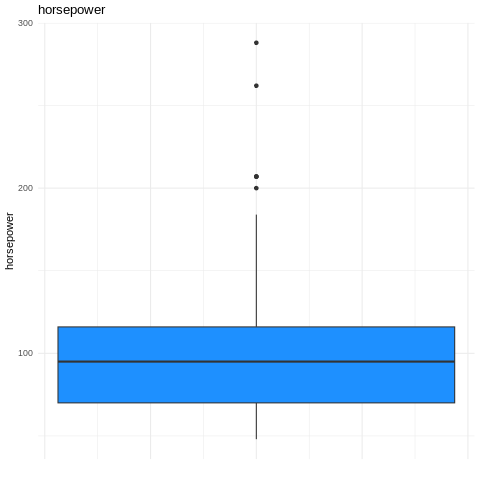

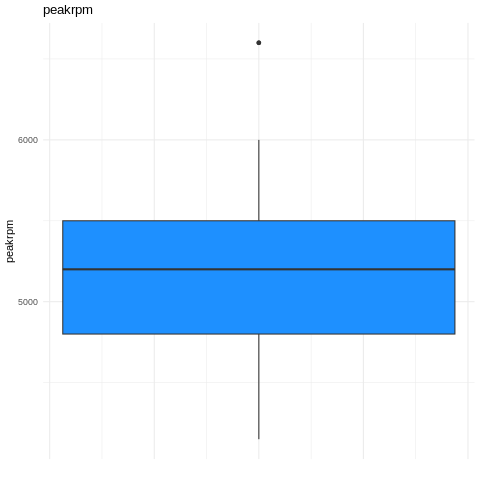

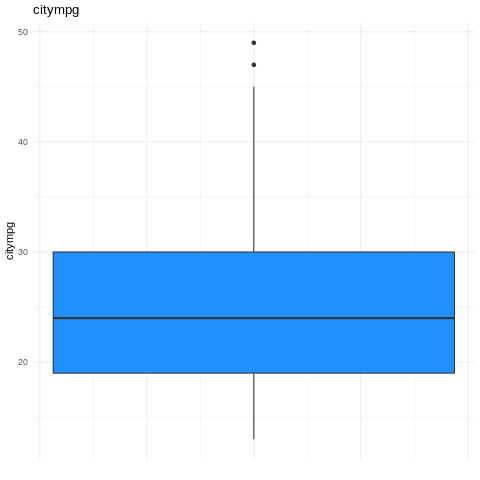

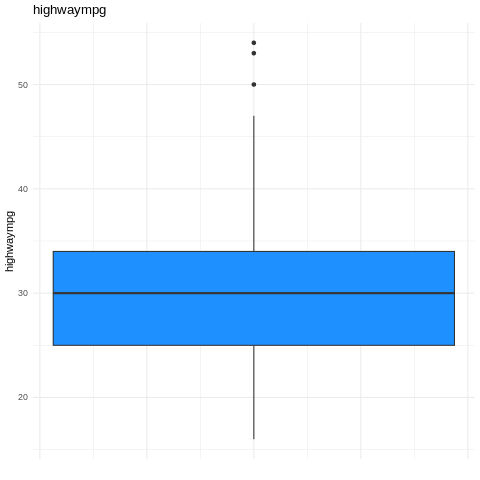

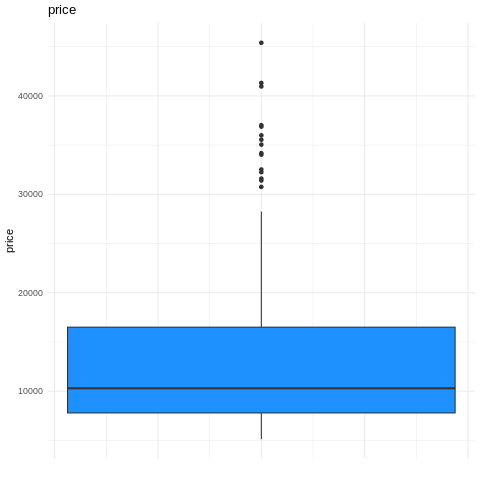

In [8]:
%%R

for (variable_name in names(quantitative_vars)) {

  # Creamos un boxplot
  p <- ggplot(data, aes(x = 1, y = !!sym(variable_name))) +
    geom_boxplot(fill = "dodgerblue") +
    labs(title = variable_name, x = "", y = variable_name) +
    theme_minimal() +
    theme(axis.text.x = element_blank())

  # Imprimimos la gráfica
  print(p)
}

En base a los resultados obtenidos, podemos determinar que *symboling*, *carheight*, *curbweight*, *peakrm* y *carlenght* poseen casi o nada de datos atípicos, mientras que el resto de datos posee una cantidad moderada o mayor de este tipo de datos, pero los que más sufren de esto son las variables *carwidth*, *enginesize*, *stroke*, *compressionratio* y *horsepower*.

Con ayuda de la línea que representa a la mediana, podemos determinar qué tan sesgados se encuentran los datos de forma que se puede estimar si existe una distribución normal o no. Variables como *symboling*, *carwidth*, *enginesize*, *compressionratio*, *horsepower* y *highwaympg* son valores que tienden a una normalidad debido a que la línea media en cada una de sus boxplots se aproxima o esta muy cerca de la mitad, mientras que otras variables sufren demasiado de sesgo hacia valores bajos como *curbweight* o *wheelbase*, y altos como *carheight* o *stroke*.

A pesar de que estas variables contengan datos atípicos y algunos no presenten un comportamiento normal según estas gráficas, además de que en algunas se presente mayor variabilidad que en otras debido al tamaño de sus cajas, esto no nos indica que son completamente descartables o no, simplemente este recurso nos ayuda a comprender ciertas caracterísitcas que son relevantes para posteriormente, en conjunto con otros análisis, gráficas y valores, se seleccionarán las variables que mejor se adapten al modelo a implementar, por lo que aún es muy pronto para desechar variables cuantitativas.

### **Diagramas de Dispersión**
Desplegaremos todas las posibles combinaciones que podamos relizar comparando todas las variables con todas, con el fin de evaluar las posibles relaciones que exisan entre las variables. Para ello, necesitamos tomar en cuenta los posibles patrones que podamos encontrar, ya sean positivos, negativos o simplemente no exista alguna relación entre dichas variables. Entre otras cosas que podremos identificar están los posibles datos atípicos, la concentración y forma de ajustar de los datos, correlaciones que peuden variar entre -1 (correlación negativa perfecta) a 1 (correlación positiva perfecta) y 0 (no existe correlación lineal).

Tomando en cuenta lo mencionado anteriormente, se identificarán, detectarán, evaluarán y explorarán las relaciones, tendencias y ajustes de las variables con el fin de definir de forma precisa cuáles son las variables influyentes que vale la pena tomar en cuenta para el posterior análisis con respecto a la variable "precio":

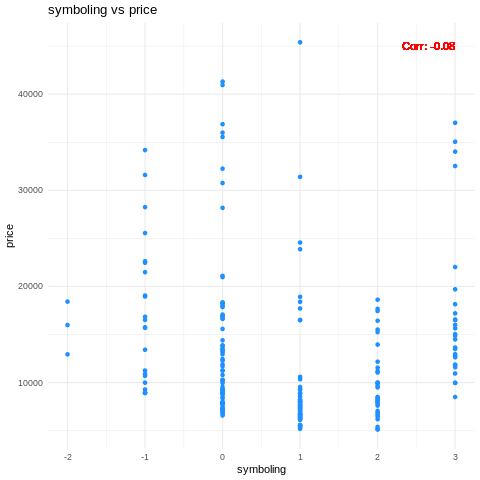

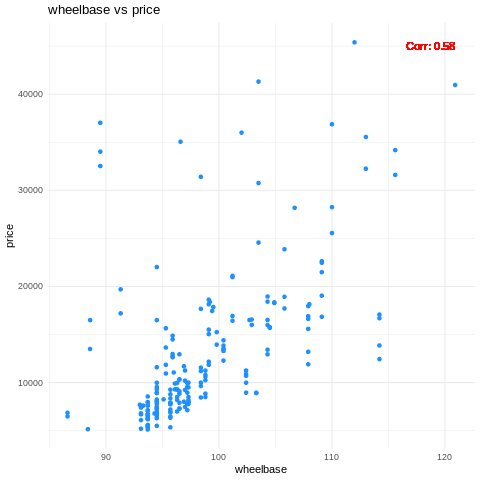

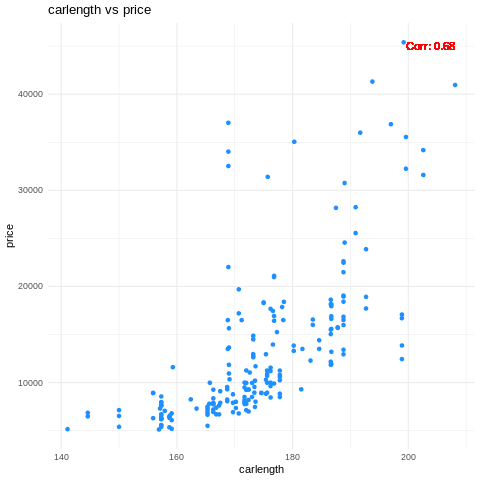

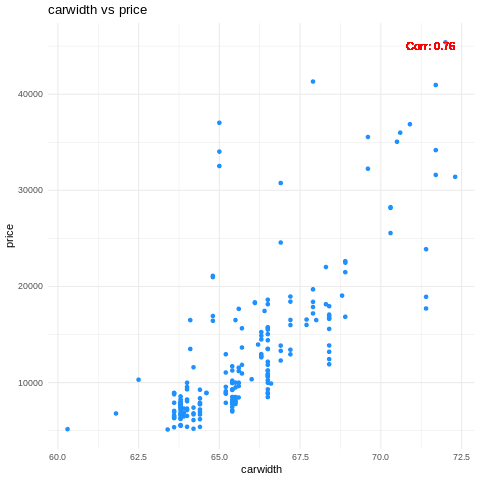

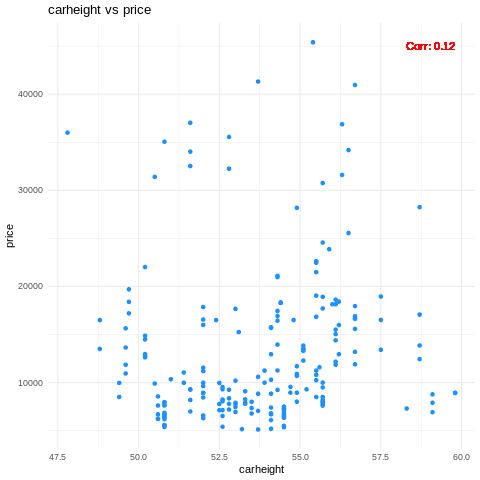

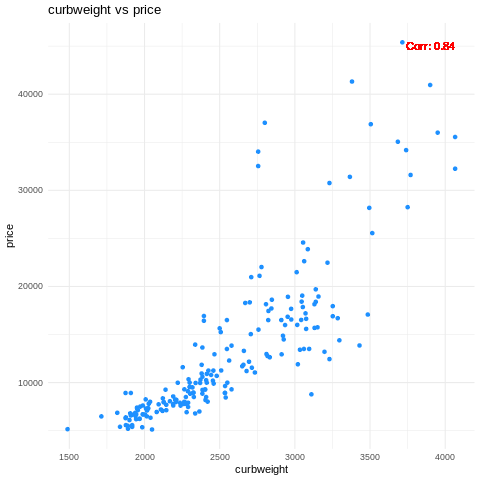

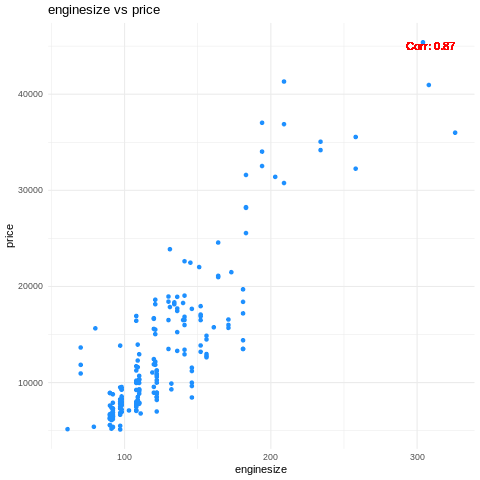

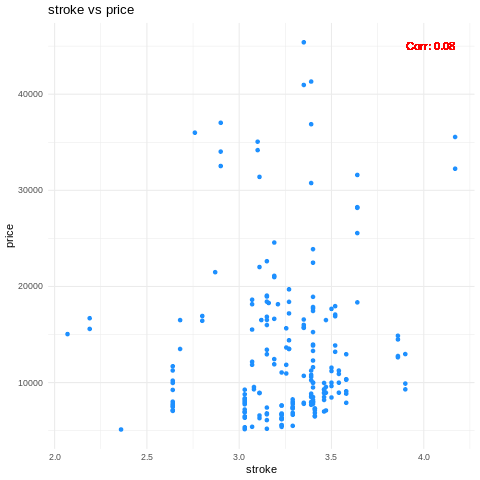

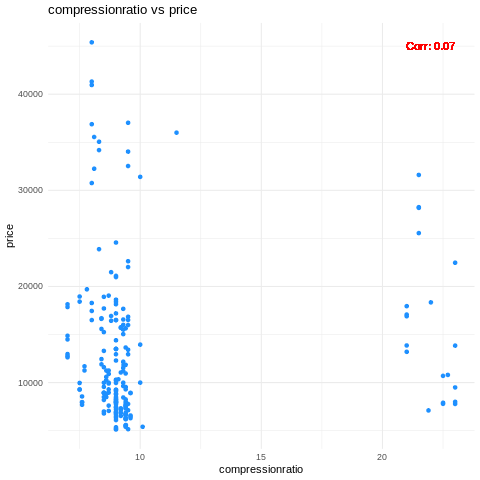

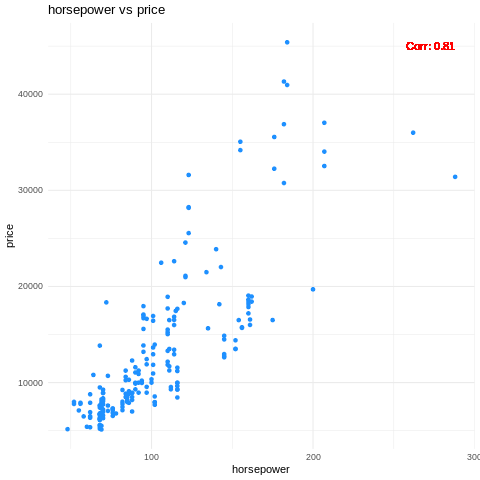

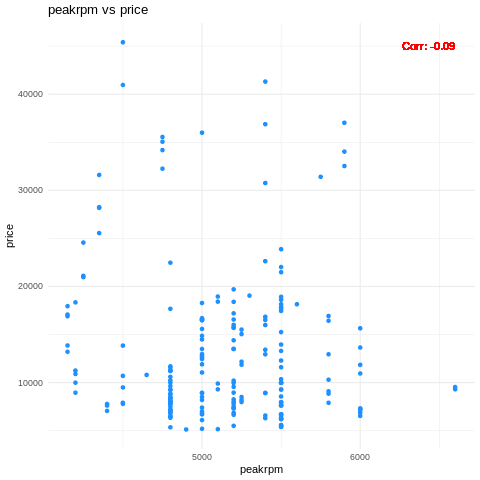

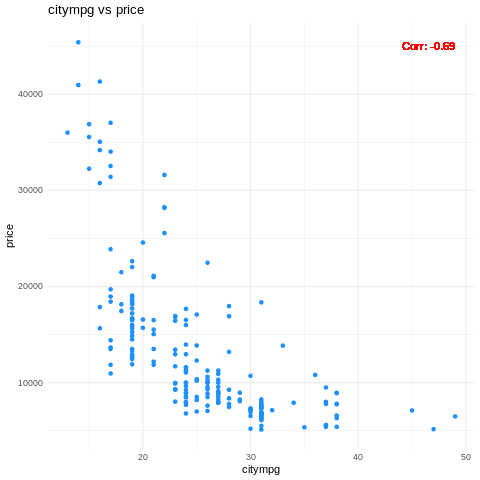

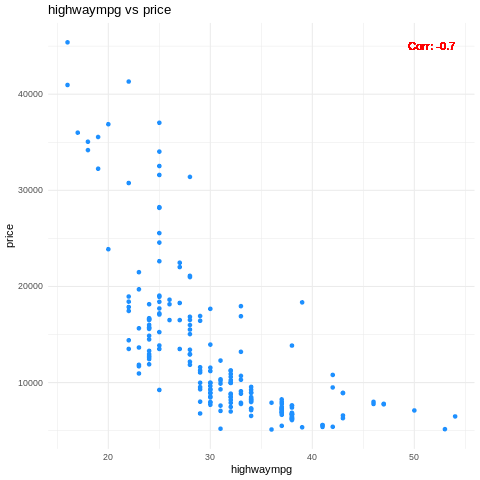

In [9]:
%%R

for (var1 in names(quantitative_vars)) {
  for (var2 in names(quantitative_vars)) {
    if (var1 != var2 && var1 != "price" && var2 == "price") {
      # Calculamos el coeficiente de correlación
      corr_coeff <- cor(data[[var1]], data$price)
      # Creamos una gráfica de dispersión
      p <- ggplot(data, aes(x = !!sym(var1), y = !!sym(var2))) +
        geom_point(color = "dodgerblue") +
        geom_text(aes(x = max(!!sym(var1)), y = max(price), label = paste("Corr:", round(corr_coeff, 2))),
                hjust = 1, vjust = 1, color = "red") +
        labs(title = paste(var1, "vs", var2), x = var1, y = var2) +
        theme_minimal()

      # Desplegamos la gráfica
      print(p)
    }
  }
}

### **Análisis de Correlación**
Como podemos observar, muchas de las gráficas generadas no demuestran tener algún tipo de relación directa con respecto al resto de las variables, inclusive hay variables que presentan comportamientos bastante peculiares pero nada de liniealidad ni presentan algún tipo de correlación entre ellas. Aún así, podemos destacar otras variables que sí se ajustan entre ambas y demustran tener poca o mucha linealidad. Por ejemplo, podemos destacar gráficas como:

* wheelbase vs price (coeff 0.58)
* carlenght vs price (coeff 0.68)
* carwidth vs price (coeff 0.76)
* curbweight vs price (coeff 0.84)
* enginesize vs price (coeff 0.87)
* horsepower vs price (coeff 0.81)
* citympg vs price (coeff -0.69)
* highwaympg vs price (coeff -0.7)

De las 14 variables cuantitativas, solo 9 son las que mejor correlación presentan con respecto al precio de los autoa. Aún así, analizaremos en las siguientes secciones si es necesario excluir otras variables o quedarnos con el conjunto elegido hasta el momento.

### **Matriz de Correlación**

Esta gráfica es un complemento más para lo visto en la sección anterior, se busca ahondar un poco más en la correlación de estas variables con respecto al precio:

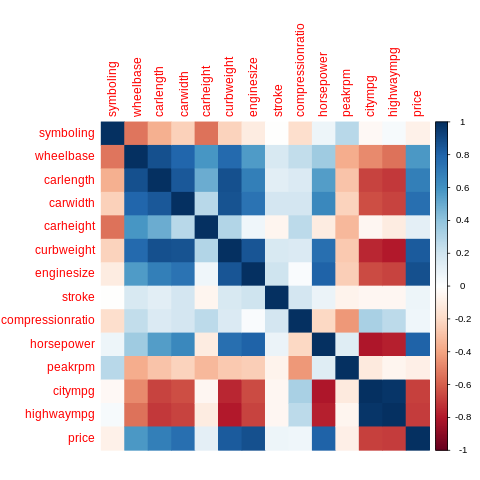

In [10]:
%%R

# Matriz de correlaciones y dispersión para las variables cuantitativas
# Calculamos la matriz de correlación
correlation_matrix <- cor(quantitative_vars)

# Creamos una gráfica de correlación
corrplot(correlation_matrix, method = "color")

## **Visualización de Variables Cualitativas (Categóricas)**

In [11]:
%%R

# Estadísticas descriptivas para las variables categóricas
categorical_vars <- data %>% select_if(~ !is.numeric(.))

# Generamos una tabla comparativa
summary_stats_table <- kable(summary(categorical_vars), format = "markdown")

# Preparamos los datos para graficar
plot_data <- categorical_vars %>%
  pivot_longer(everything(), names_to = "variable", values_to = "value")

# Desplegamos la tabla
print(summary_stats_table)



|   |  CarName        |  fueltype       |  carbody        | drivewheel      |enginelocation   | enginetype      |cylindernumber   |
|:--|:----------------|:----------------|:----------------|:----------------|:----------------|:----------------|:----------------|
|   |Length:205       |Length:205       |Length:205       |Length:205       |Length:205       |Length:205       |Length:205       |
|   |Class :character |Class :character |Class :character |Class :character |Class :character |Class :character |Class :character |
|   |Mode  :character |Mode  :character |Mode  :character |Mode  :character |Mode  :character |Mode  :character |Mode  :character |


### **Diagramas de Pastel y de Barras**
Los diagramas de pastel y de barras a elaborar consideran el cálculo de tablas de frecuencia para cada una de las variables categóricas. Utiliza el dataset "plot_data" y agrupa los datos por valores categóricos y sus valores únicos. Este tipo de procedimientos se realizan para entender de mejor manera la composición de las variables categóricas y sus frecuencias relativas dentro del set de datos:

`summarise()` has grouped output by 'variable'. You can override using the
`.groups` argument.


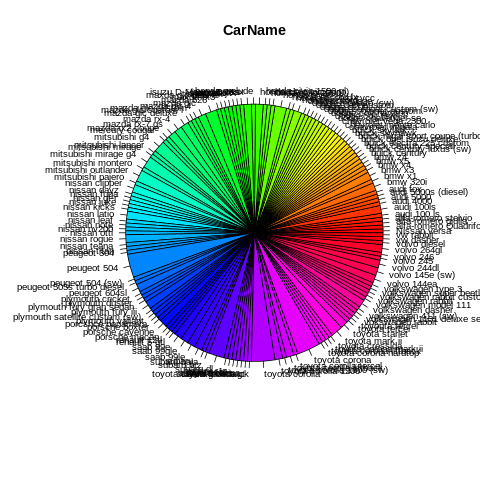

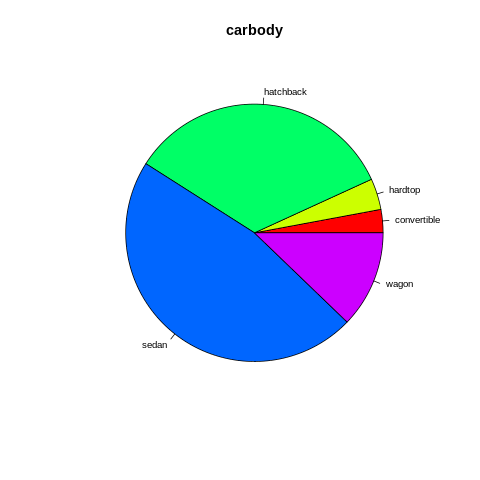

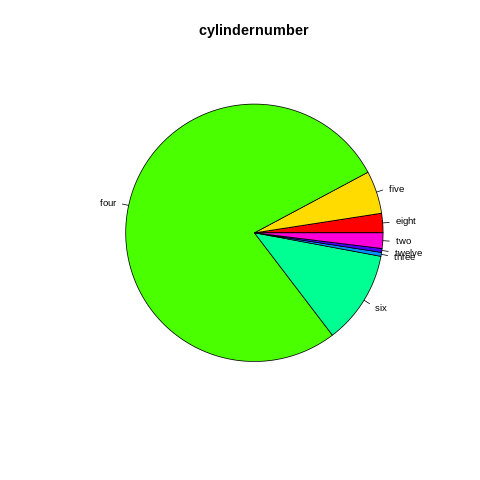

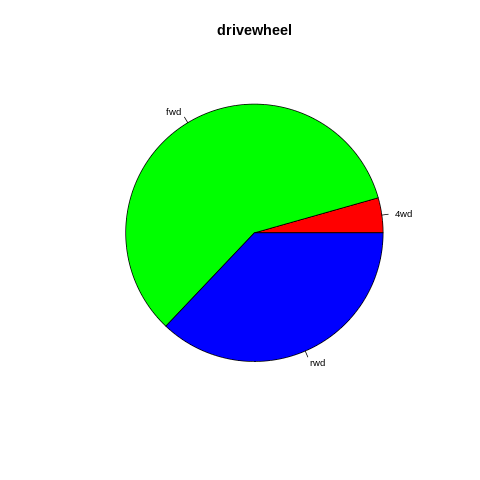

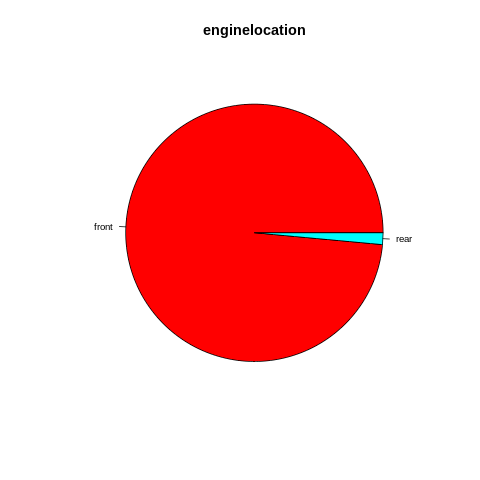

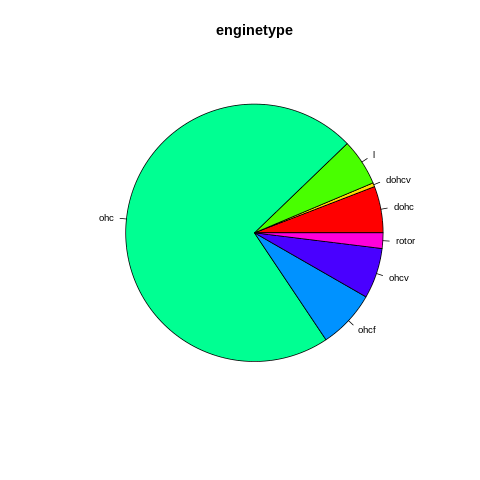

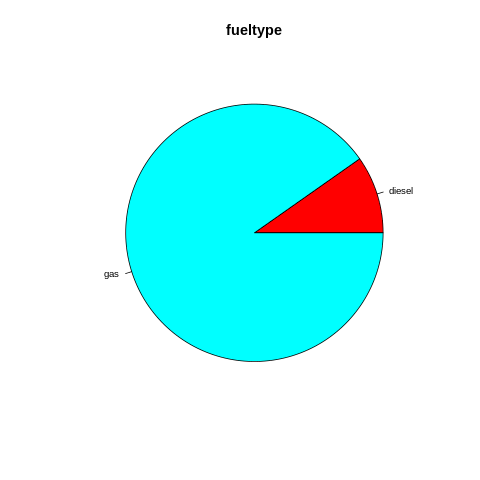

In [12]:
%%R

# Calculamos tablas de frecuencia para cada variable categórica
categorical_vars <- plot_data %>%
  group_by(variable, value) %>%
  summarise(frequency = n()) %>%
  ungroup()

# Iteramos por cada variable categórica y creamos sus respectivas gráficas de pastel
for (variable_name in unique(categorical_vars$variable)) {

  subset_data <- categorical_vars %>%
    filter(variable == variable_name)

  labels <- subset_data$value
  sizes <- subset_data$frequency

  # Creamos una gráfica de pastel
  pie(sizes, labels = labels, col = rainbow(length(labels)), main = variable_name, cex = 0.8)
}


### **Gráfica de Barras**

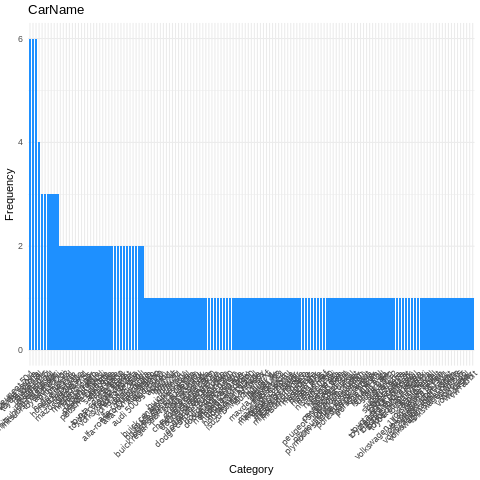

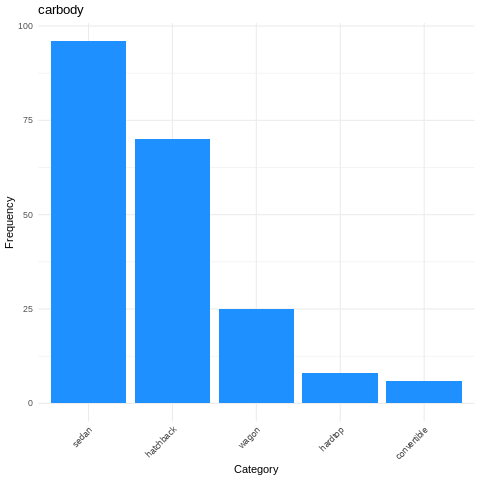

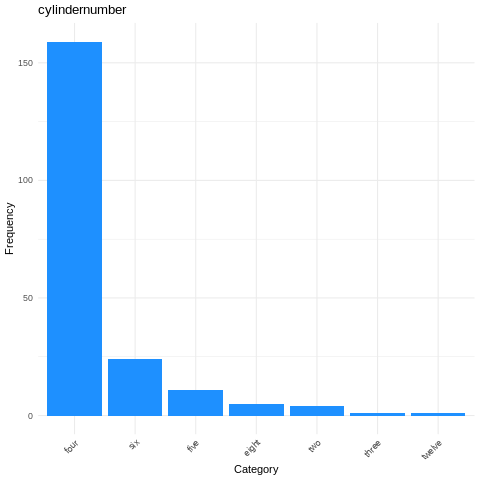

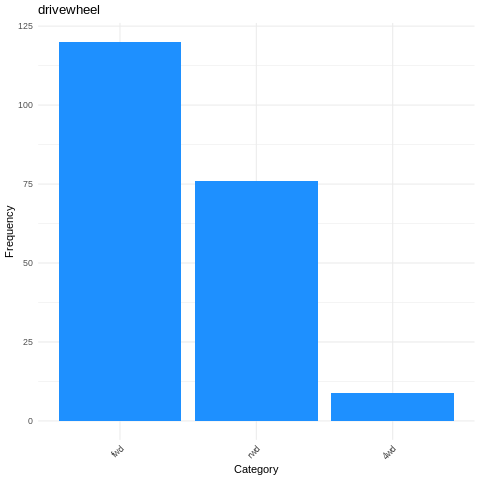

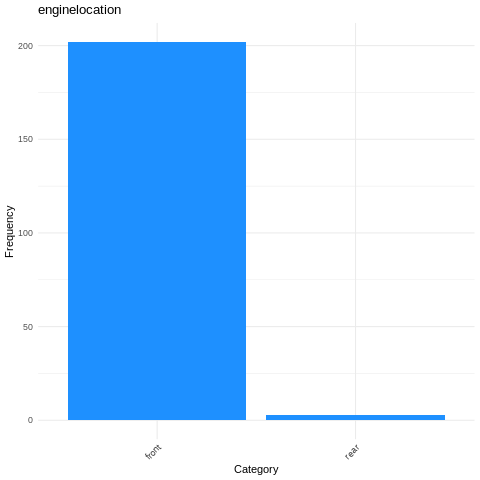

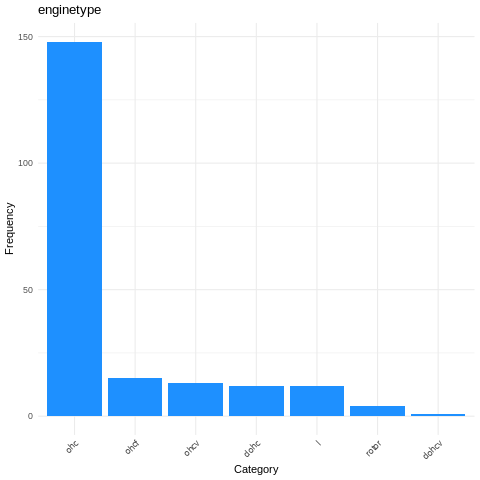

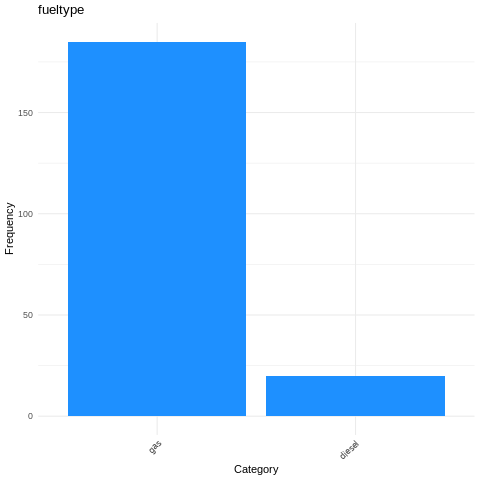

In [13]:
%%R

# Iteramos por cada variable categórica y creamos su gráfica de barras
for (variable_name in unique(categorical_vars$variable)) {

  subset_data <- categorical_vars %>%
    filter(variable == variable_name)

  # Creamos la gráfica de barras
  p <- ggplot(subset_data, aes(x = reorder(value, -frequency), y = frequency)) +
    geom_bar(stat = "identity", fill = "dodgerblue") +
    labs(title = variable_name, x = "Category", y = "Frequency") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

  print(p)
}


Con respecto a las gráficas obtenidas, podemos observar que los agrupamientos de las gráficas con mayor variedad de tipo de datos son:

* *Carname*
* *cardbody*
* *cylindernumber*
* *enginetype*

Y con respecto al resto de variables categóricas, estas son las que menos variedad de datos tienen:

* *drivewheel*
* *enginelocation*
* *fueltype*

Ahora que tenemos los resultados de estas gráficas de frecuencias y agrupamientos relativos de datos, podemos entender claramente la distribución de los datos con sus distintos grupos; esto nos puede mostrar perspectivas de cuáles categorías son las más o menos predominantes dentro del dataset.

El hecho de poder conocer la distribución de lso datos categóricos resulta muy útil para enfocarnos en las variables que tienden a tener un impacto significativo en el valor objetivo, en este caso es *price*. Además, este procedimiento nos ayuda a identificar potenciales retos, como lo es el desequilibrio de clases, el cual puede afectar el rendimiento del modelo. Evaluar este tipo de problemas durante el desarrollo del modelo estadístico asegura estimaciones más certeras y precisas. Siendo que las variables categóricas pueden variar entre pocos o muchos subconjuntos de datos, puede indicarnos cómo es que influye est variación con el precio de los autos.

## **Identificando Problemas de Calidad**

Con base en el análisis realizado utilizando la base de datos de los precios de autos, podemos concluir que variables como *wheelbase*, *carlenght*, *carwidth*, *curbweight*, *enginesize*, *horsepower*, *citympg* y *highwaympg* presentan una correlación muy estrecha con la variable objetivo que es *price* de entre todas las variables cuantitativas, lo cual se ve reflejado claramente tanto en la matriz de correlaciones como en las gráficas de dispersión.

En cuanto a valores atípicos y como se mencionó en la sección de *boxplots*, se puede apreciar gracias a las gráficas de caja y bigotes que variables como *symboling*, *carheight*, *curbweight*, *peakrm* y *carlenght* presentan valores atípicos mínimos, casi o completamente nulos, lo cuál sugiere que su impacto dentro de inferencias estadísticas será menor si nos referimos a que podrían afectar el análisis de los datos. Por otro lado, variables como *carwidth*, *enginesize*, *stroke*, *compressionratio* y *horsepower* presentan más irregularidades en cuanto a sus datos. Estos datos atípicos pueden presentar bastantes distorsiones para posibles análisis de datos, claro que se podrían excluir con métodos como transformaciones o métodos estadísitcos robustos para regularizar este comportamiento, con el fin de no descartar por completo dichas variables y además obtener resultados precisos para posibles pruebas e investigaciones a futuro.

Ahora, con respecto a los datos faltantes dentro de la base de datos proporcionada, encontré un par de irregularidades que se presentan más dentro de las variables categóricas que en las cuantitativas. Algunas de estas son errores de dedo, datos mal escritos, incompletos o bien que no te dicen nada sobre el valor de la variable, pero son desperfectos mínimos, casi no se presentan casos de este tipo dentro de los datos. Si hablamos de los datos cuantitativos, es más difícil determinar si los números son datos erróneos a simple vista, de hecho las posibles irregularidades (datos atípicos) que existan se pueden identificar con el análisis explicado anteriormente, pero si hablamos de datos faltantes no encontré algún campo vacío o bien datos no numéricos.

## **Selección de Variables a Utilizar**

Tomando en cuenta las conclusiones planteadas anteriomente, he determinado que las variables cuantitativas más útiles para un análisis más profundo que mejore la solidez de las conclusiones que podamos formular son las siguientes:

  * Highwaympg
  * Citympg
  * Horsepower
  * Enginesize
  * Curbweight
  * Carwidth
  * Carlength
  * Wheelbase

Si hablamos de variables categóricas, estás serían las seleccionadas para aportar al análisis por cuestión tanto de lógica como del resultados realizados previamente:

  * fueltype
  * cardbody
  * drivewheel
  * enginelocation
  * enginetype
  * cylindernumber

Además de ser datos que por lógica de relación consideraríamos como relevantes para su posterior análisis, también el hecho de que se haya analizado estos datos por medio de tablas y gráficas nos ayuda a entender de mejor forma su comportamiento, distribución y cantidad de agrupamientos existentes, y con ello determinar si en realidad aportan o se ajustan al contexto con el que deseamos trabajar.


# **Preparación de la Base de Datos**

### **Filtrado y Limpieza de los Datos Categóricos**

En primera instancia verificaremos si las variables categóricas presentan valores faltantes o NAs en su defecto:

In [14]:
%%R

# Filtramos y verificamos si existen campos vacíos en las variables categóricas
empty_categorical_vars <- data %>%
  select_if(~ is.factor(.) | !is.numeric(.)) %>%
  summarise_all(~ sum(is.na(.)))

# Imprimimos el resultado
cat("Variables categóricas faltantes: ", sum(empty_categorical_vars))

Variables categóricas faltantes:  0

Básicamente se tomaron las columnas de interés para su posterior uso y análisis, y con ello obtenemos los siguientes datos:

In [15]:
%%R

# Seleccionamos solamente las variables categóricas del dataset
categorical_vars <- data %>% select_if(~ !is.numeric(.))

# Creamos un dataframe solamente incluyendo las variables categóricas seleccionadas para nuestro análisis
relevant_categorical_vars <- data[, c("fueltype", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber")]

head(relevant_categorical_vars)

  fueltype     carbody drivewheel enginelocation enginetype cylindernumber
1      gas convertible        rwd          front       dohc           four
2      gas convertible        rwd          front       dohc           four
3      gas   hatchback        rwd          front       ohcv            six
4      gas       sedan        fwd          front        ohc           four
5      gas       sedan        4wd          front        ohc           five
6      gas       sedan        fwd          front        ohc           five


### **Filtrado y Limpieza de los Datos Cuantitativos**

Dentro de esta sección se realiza un procemiento muy similar al anterior pero con lo valores cuantitativos. Al preprocesar los datos, se seleccionan y se extrae el conjunto de interés, se filtran los datos atípicos que se encuentren fuera del rango que se considera respecto a los intercuantiles (Q1 y Q3) de forma que tenemos un rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR], excluyendo los valores que se encuentren fuera del mismo.

In [36]:
%%R

# Estadísticas descriptivas para las variables cuantitativas
quantitative_vars <- data %>% select_if(is.numeric)

# Definimos una función para filtrar los datos atípicos
filter_outliers <- function(x) {
  qnt <- quantile(x, probs = c(0.25, 0.75), na.rm = TRUE)
  h <- 1.5 * IQR(x, na.rm = TRUE)
  x <- ifelse(x < (qnt[1] - h) | x > (qnt[2] + h), NA, x)
  return(x)
}

# Aplicamos la función de filtrado para cada una de las columnas en la variables "quantitative_vars"
quantitative_vars_cleaned <- quantitative_vars %>%
  mutate(across(everything(), filter_outliers))

# Seleccionamos solamente las columnas deseadas para guardarlas dentro de "quantitative_vars_cleaned"
selected_columns <- c("price", "highwaympg", "citympg", "horsepower", "enginesize",
                      "carwidth", "carlength", "wheelbase", "curbweight")

quantitative_vars_cleaned <- quantitative_vars_cleaned %>%
  dplyr::select(selected_columns)

head(quantitative_vars_cleaned)

  price highwaympg citympg horsepower enginesize carwidth carlength wheelbase
1 13495         27      21        111        130     64.1     168.8      88.6
2 16500         27      21        111        130     64.1     168.8      88.6
3 16500         26      19        154        152     65.5     171.2      94.5
4 13950         30      24        102        109     66.2     176.6      99.8
5 17450         22      18        115        136     66.4     176.6      99.4
6 15250         25      19        110        136     66.3     177.3      99.8
  curbweight
1       2548
2       2548
3       2823
4       2337
5       2824
6       2507


### **Unión de los Datos Cuantitativos con los Categóricos**
Tomamos tanto los valores cuantitativos como los categóricos y los fusionamos en un mismo conjunto de datos

In [37]:
%%R
# Combinamos los datos categóricos con los datos cuantitativos
final_data <- cbind(quantitative_vars_cleaned, relevant_categorical_vars)
head(final_data)

  price highwaympg citympg horsepower enginesize carwidth carlength wheelbase
1 13495         27      21        111        130     64.1     168.8      88.6
2 16500         27      21        111        130     64.1     168.8      88.6
3 16500         26      19        154        152     65.5     171.2      94.5
4 13950         30      24        102        109     66.2     176.6      99.8
5 17450         22      18        115        136     66.4     176.6      99.4
6 15250         25      19        110        136     66.3     177.3      99.8
  curbweight fueltype     carbody drivewheel enginelocation enginetype
1       2548      gas convertible        rwd          front       dohc
2       2548      gas convertible        rwd          front       dohc
3       2823      gas   hatchback        rwd          front       ohcv
4       2337      gas       sedan        fwd          front        ohc
5       2824      gas       sedan        4wd          front        ohc
6       2507      gas       

### **Limpiamos Posibles Datos Faltantes (NA)**
Este paso ya se había realizado con los datos categóricos, sin embargo para tomar precauciones y evitar interferencias con el correcto análisis de los datos, se buscarán campos vacíos dentro del conjunto de datos completo:

In [38]:
%%R
final_data <- final_data %>%
  mutate_all(~ifelse(is.na(.), mean(., na.rm = TRUE), .))

## **Regresión Lineal Múltiple**

### **Fórmula de la regresión lineal**

Dentro de este apartado implementaremos la fórmula de regresion lineal múltiple que considera a *price* como la variable dependiente de las variables independientes que elegimos en las secciones anteriores.

Cabe resalta que en un principio abordaremos este análisis sin realizar algún tipo de transformación o uso de otra herramienta estadística que busque normalidad de momento, con el fin de observar cómo se comportan los datos sin estos recursos.

In [48]:
%%R
A <- lm(formula = price ~ highwaympg + citympg + horsepower + enginesize + carwidth + carlength + wheelbase + curbweight + fueltype + carbody + drivewheel + enginelocation + enginetype + cylindernumber, data = final_data)

### **Evaluación de las variables más apropiadas para realizar la regresión lineal**
En base al modelo de regresión lineal creado por la función *lm()*, se realizará un ajuste a las variables consideradas para ser parte del modelo. Ya sea que se quiten o se agreguen variables con el procedimiento de selección del modelo de regresión paso a paso.

In [49]:
%%R
step(A, direction="both",trace=1)

Start:  AIC=3225.39
price ~ highwaympg + citympg + horsepower + enginesize + carwidth + 
    carlength + wheelbase + curbweight + fueltype + carbody + 
    drivewheel + enginelocation + enginetype + cylindernumber

                 Df Sum of Sq        RSS    AIC
- enginetype      5  45229411 1107277787 3223.9
- highwaympg      1   3931596 1065979971 3224.2
- carlength       1   6612769 1068661145 3224.7
- enginelocation  1   6622058 1068670433 3224.7
- horsepower      1   6929772 1068978147 3224.7
<none>                        1062048376 3225.4
- curbweight      1  14452748 1076501124 3226.2
- carwidth        1  22112169 1084160545 3227.6
- carbody         4  61070526 1123118901 3228.9
- fueltype        1  37953771 1100002147 3230.6
- citympg         1  41144766 1103193142 3231.2
- wheelbase       1  58534553 1120582929 3234.4
- cylindernumber  5 130721661 1192770037 3239.2
- drivewheel      2  97207699 1159256075 3239.3
- enginesize      1 130359116 1192407492 3247.1

Step:  AIC=3223.

### **Volvemos a declarar la función de Regresión Lineal**

Esto se realiza con la finalidad de incluir el resultado proporcionado por la función *step()*, que evaluó diferentes modelos mediante la adición o supresión de posibles variables predictivas para nuestro modelo *A*. Las variables que se consideraron conservar en el modelo son:

  1. **Variables Cuantitativas Conservadas:**

    * Citympg
    * Horsepower
    * Enginesize
    * Carwidth
    * Wheelbase
    * Curbweight

  2. **Variables Categóricas Conservadas:**

    * Fueltype
    * Carbody
    * DriveWheel
    * Enginelocation
    * Cylindernumber

Con respecto a las variables cuantitativas se suprimió a *highwaympg*, *carlenght* y *enginetype*, y en cuanto a las variables categóricas se suprimió solamente a *drivewheel*, por lo que estaremos trabajando con estas variables independientes para posteriormente evaluar este modelo.

In [85]:
%%R
A <- lm(formula = price ~  citympg + horsepower + enginesize + carwidth + wheelbase + curbweight + fueltype + carbody + drivewheel + enginelocation + cylindernumber, data = final_data)

### **Normalidad de los Residuos**
Utilizando herramientas de análisis estadístico, podemos observar cómo la gráfica de histograma nos muestra un comportamiento bastante cercano a una normal debido a su distribución y comportamiento, a pesar de ello, la gráfica de QQPlot nos indica que los datos de residuo no se comportan como una normal debido a que ciertos datos están esparcidos por ambos extremos de la distribución de los datos. Lo que se prentede realizar en base a estos resultados es ajustar lo mejor posible los datos, ya sea excluyendo/filtrando variables, normalizando los datos o bien haciendo transformaciones, esto con el fin de obtener un dataset confiable del cual podamos confiar y nos ayude a establecer modelos con mejores resultados.

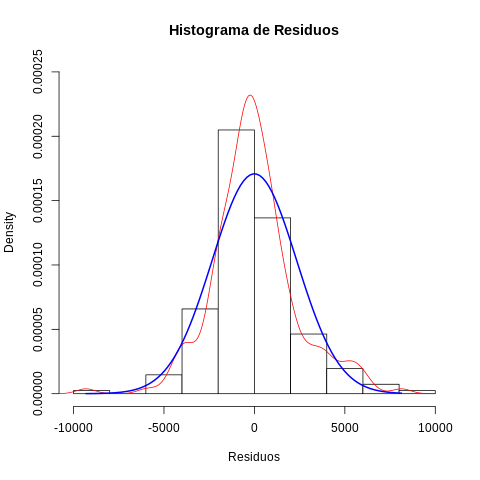

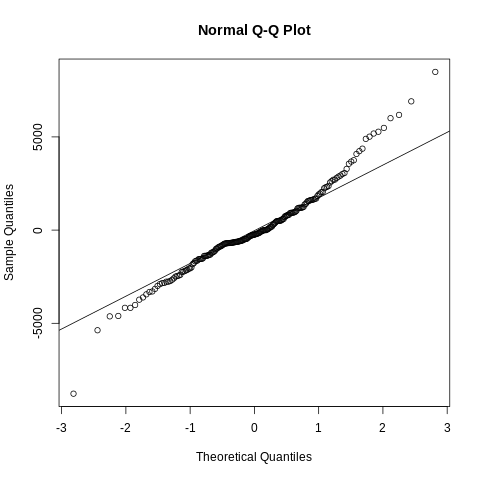

In [134]:
%%R
# Histograma de residuos
hist(R$residuals, freq=FALSE, ylim = c(0, 0.00025), main="Histograma de Residuos", xlab="Residuos", col=0)
lines(density(A$residuals),col="red")
curve(dnorm(x,mean=mean(A$residuals),sd=sd(A$residuals)), from=min(A$residuals),
to=max(A$residuals), add=TRUE, col="blue",lwd=2)

# QQ plot de residuos
qqnorm(R$residuals)
qqline(R$residuals)

### **Homocedasticidad**
En cuanto a la gráfica de dispersión que proyecta homocedasticidad de los datos, en realidad no demuestra homocedasticidad casi para nada. Existen ciertos datos que no existe un rango consistente de los residuos con respecto a los valores ajustados.

Otro indicio muy importante a destacar es que dichos valores poseen una forma muy peculiar, podríamos decir que es como una especie de cono, lo cual no se relaciona para nada con homocedasticidad, lo que demuestra nuevamente que los datos no tienen un comportamiento constante a través del rango de valores ajustados.

Dichas observaciones pueden interpretarse de forma que, tanto los p-values, como los coeficientes, y posibles intervalos de confianza que calculemos o bien ya tenemos calculados, no nos sirven para nada, ya que esto se trata más bien de un caso de heterocedasticidad más que otra cosa.

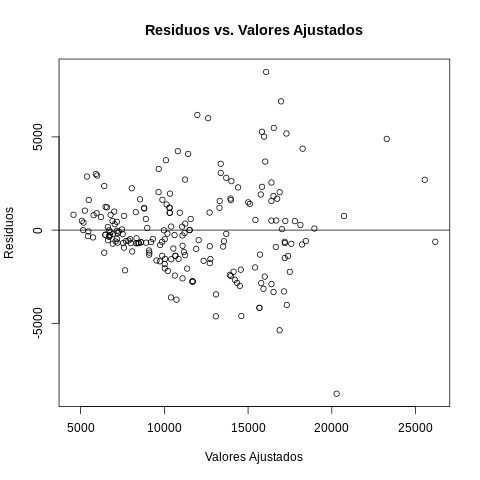

In [44]:
%%R
# Scatterplot of residuals vs. fitted values
plot(R$fitted.values, R$residuals, main="Residuos vs. Valores Ajustados", xlab="Valores Ajustados", ylab="Residuos")
abline(h=0, color="blue")

### **Prueba de Hipótesis**

Para esta situación en concreto, he definido una función de hipótesis en la cual para cada una de las variables se debe cumplir que:

  *   $H_0:p-value < 0.05$
  *   $H_1:p-value >= 0.05$

Esto se hace con el fin de determinar qué tipo de variables son convenientes dejar en el modelo y cuales deben ser removidas por su carencia de relación con respecto a la variable "precio". El t-value de cada uno de estos valores ayudará a determinar de mejor forma qué variable no es estadísticamente significativa para el contexto del problema. Entre más grande sea el t-value y menor su distancia con respecto a la media, la variable resultará más significativa al modelo, por el contrario, entre más pequeño sea el t-value y mayor sea su distancia con respecto a la media, menor influencia y más irrelevante se vuelve la variable.

In [45]:
%%R
summary(R)


Call:
lm(formula = price ~ highwaympg + citympg + horsepower + enginesize + 
    carwidth + carlength + wheelbase + curbweight + fueltype + 
    carbody + drivewheel + enginelocation + enginetype + cylindernumber, 
    data = final_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8776.3 -1214.2  -249.4  1158.4  8486.9 

Coefficients: (1 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -28899.819  12474.068  -2.317  0.02166 *  
highwaympg               77.809     96.124   0.809  0.41933    
citympg                -292.156    111.569  -2.619  0.00959 ** 
horsepower               15.569     14.487   1.075  0.28399    
enginesize               69.817     14.979   4.661 6.17e-06 ***
carwidth                410.578    213.878   1.920  0.05651 .  
carlength               -45.933     43.754  -1.050  0.29524    
wheelbase               248.075     79.426   3.123  0.00209 ** 
curbweight               -2.348    

### **Conclusiones sobre la prueba de hipótesis**
Teniendo en cuenta la prueba de hipótesis  que se realizó acerca de los t-values de cada una de las variables y en terminos de la misma, se buscaba rechazar esta función de hipótesis, con el fin de descartar las variables que no plasmaran una significancia relevante para el contexto del problema, y esto nos ayuda a filtrar de mejor manera cada una de las variables que influyen en el modelo. En base a esta tabla proporcionada por la función de summary() podemos destacar a las variables **citympg**, **horsepower**, **curbweight**, **fueltypediesel**, **carbodyconvertible** y **carbodysedan** como potenciales variables significativas para predecir con mejor precisión a **price**. Otro valor que da soporte a la significancia de estas variables es el t-value, por ejemplo, en cuanto a la variable "horsepower" podemos identificar que este cuenta con un t-value de 2.648, lo que nos indica que este coeficiente se encuentra 2.648 veces lejano a el error estándar lejos de 0, esto también lo podemos observar con citympg, aunque su coeficiente negativo nos indica una relación inversa con respecto a price, esto además de tener un sentido estadístico es también lógico, ya que al aumentar las millas por galón de un auto, su valor decrese. Si hablamos de curbweight, su coeficiente estimado de 4.526 nos dice que en promedio, el valor estimado del precio del automóvil aumenta aproximadamente $4,526; fueltypediesel nos muestra que los vehículos con motor diesel tienden a ser más caros que los vehículos motorizados por gasolina.

Otras características a mencionar son que el modelo en su totalidad es altamente significante, por lo menos con una variable, debido a que existe un p-value: < 2.2e-16 menor comparado a la estadística F. En cuanto al valor de la r^2, podemos determinar que el 80.97% explica la proporción de variabilidad en la variable de respuesta del modelo.

### **Aplicamos una transformación de datos**
Esta transformación que realizaremos es un recurso bastante útil para encontrar una distribución normal de los datos. Para ello, necesitaremos recurrir a la transformación de Box-Cox. Para ello necesitamos tomar las variables que destacaron una correlación fuerte con el precio

Lambda:  -0.3434343

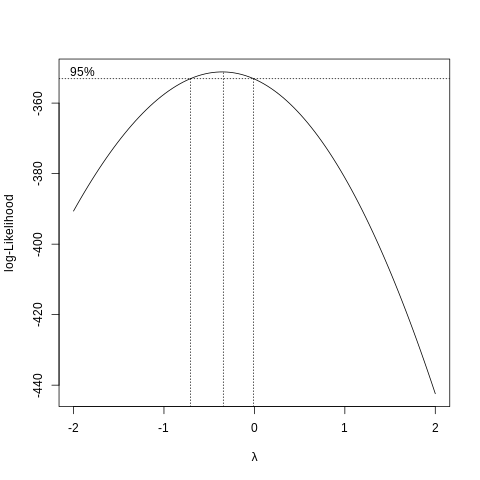

In [53]:
%%R
# Seleccionamos la variable dependiente para transformarla
dependent_variable <- final_data$price

# Utilizamos la función boxcox para encontrar la lambda óptima
bc_result <- boxcox(lm(dependent_variable ~ 1))

# Extraemos el valor de la lamba óptima
optimal_lambda <- bc_result$x[which.max(bc_result$y)]

cat("Lambda: ", optimal_lambda)

# Aplicamos la transformación boxcox a la variable dependiente seleccionada utilizando el valor lambda óptimo
transformed_dependent_variable <- (dependent_variable^optimal_lambda - 1) / optimal_lambda

La gráfica de Box-Cox nos permite identificar qué valor de lambda es el que maximiza la función de verosimilitud (o bien minimiza alguna otra medida de no linearidad). Debido a que el valor de lambda arrojado por la función es negativo, esto indica que con respecto a los valores de la variable dependiente *price* se requiere aplicar una transformación recíproca para ajustar estos datos a una normalidad.

Para transformar los valores de forma correcta, implementaremos 3 tipos de transformaciones, transformación de raíz cuadrada, transformación con valor exacto y transformación de Yeo-Johnson. Teniendo estos resultados, determinaremos la mejor transformación y procederemos a utilizar la que mejor resultados arroje.

### Aplicamos las 3 transformaciones

Realizamos las 3 transofmraciones, además de realizar pruebas de normalidad para corroborar que dichas pruebas arrojaron buenos resultados


	Anderson-Darling normality test

data:  dependent_variable
A = 5.2877, p-value = 4.271e-13


	Anderson-Darling normality test

data:  cal1
A = 2.9123, p-value = 2.417e-07


	Anderson-Darling normality test

data:  cal2
A = 1.1113, p-value = 0.006403


	Anderson-Darling normality test

data:  cal3
A = 1.1113, p-value = 0.006403



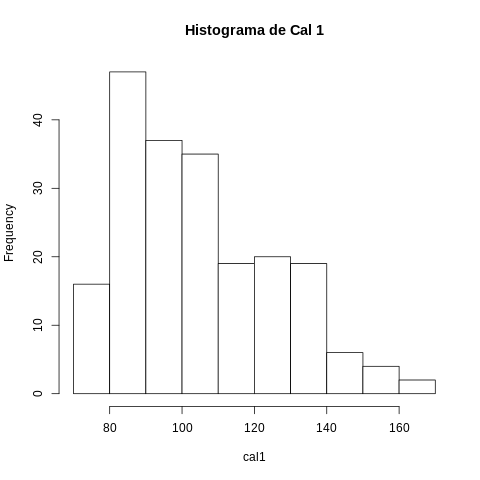

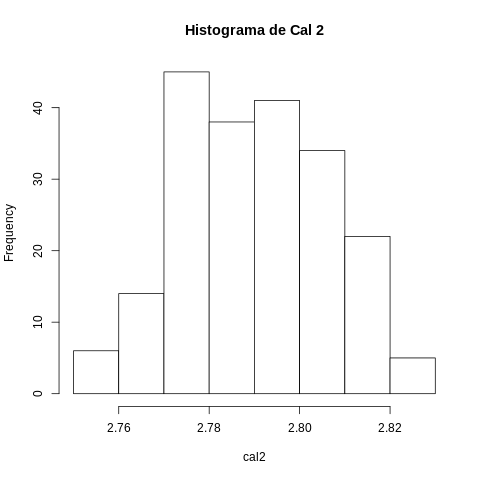

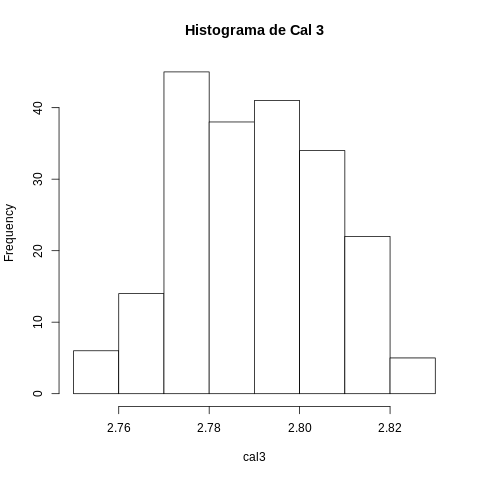

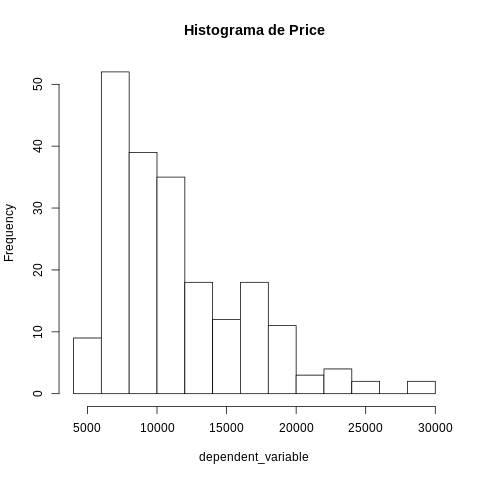

In [71]:
%%R
# Transformación 1 (Fórmula)
cal1 <- sqrt(dependent_variable + 1)

#Transformación 2 (Fórmula)
cal2 <- ((dependent_variable + 1)^optimal_lambda - 1) / optimal_lambda

# Transformación 3 (Fórmula)
cal3<- yeo.johnson(dependent_variable, lambda = optimal_lambda)

# Prueba de Normalidad
D0 = ad.test(dependent_variable)
D1 = ad.test(cal1)
D2 = ad.test(cal2)
D3 = ad.test(cal3)

print(D0)
print(D1)
print(D2)
print(D3)

# Resumen de Medidas
m0=round(c(as.numeric(summary(dependent_variable)),kurtosis(dependent_variable),skewness(dependent_variable),D0$p.value),3)
m1=round(c(as.numeric(summary(cal1)),kurtosis(cal1),skewness(cal1),D1$p.value),3)
m2=round(c(as.numeric(summary(cal2)),kurtosis(cal2),skewness(cal2),D2$p.value),3)
m3=round(c(as.numeric(summary(cal3)),kurtosis(cal3),skewness(cal3),D3$p.value),3)

# Tabla
m<-as.data.frame(rbind(m0,m1,m2, m3))
row.names(m)=c("Original","Primer modelo","Segundo Modelo", "Tercer Modelo")
names(m)=c("Minimo","Q1","Mediana","Media","Q3","Máximo","Curtosis","Sesgo","Valor p")

# Mostramos la tabla
kable(m, format = "markdown", digits = 3)

hist(cal1, col=0, main="Histograma de Cal 1")
hist(cal2, col=0, main="Histograma de Cal 2")
hist(cal3, col=0, main="Histograma de Cal 3")
hist(dependent_variable, col=0, main="Histograma de Price")

En base a los resultados recibidos por la variable dependiente original son que la prueba de Anderson-Darling rechaza fuertemente la hipótesis nula de que la variable dependiente sigue una distribución normal. El valor p es demasiado pequeño (casi 0), lo que da indicios de que los datos se desvían significativamente de la normalidad. En cuanto a su histograma, podemos observar que dicha gráfica presenta un sesgo muy marcado hacia la derecha y una curtosis moderada, presentando pocos valores extremos comparandola con una distribución normal, aunque se aleja bastante de ser una distribución cercana a la normalidad.

En cuánto a los resultados de la transformación de raíz cuadrada, tenemos que es muy similar al comportamiento de la variable dependiente original. La prueba de Anderson-Darling revela un valor p muy pequeño cercano a cero, por lo que similar al caso original, por lo que se rechaza la hipótesis nula que tiene *cal1* respecto a una distribución normal. Su histograma se encuentra un poco más cercano a algo normal, sin embargo los picos que posee son bastnate pronunciados como para comportarse con normalidad.

El caso de transformación con valor exacto arroja un resultado menos concluyente, comparado con las otras 2 transformaciones. Mientras que el valor p es relativamente pequeño, es más largo que en los casos anteriores. Esto sugiere que *cal2* puede desviarse de una distribución normal hasta cierta medida, pero la evidencia para no normalidad no es tan sólida. Y será cierto que su histograma tiende a comportarse más como una normal que el par de histogramas correspondientes a cal1 y el original respectivamente, sin embargo esto no lo hace suficiente como para considerar una buena normalidad.

El último modelo que respecta al de Yeo-Johnson no es muy distinto de *cal2*, prácticamente es el mismo modelo, muestra el mismo nivel de normalidad, que no es mucho pero es lo más cercano que se ha obtenido hasta ahora, posee el mismo valor p que *cal2*, así que sufre de la misma cantidad de desviación con respecto a una distribución normal.

Cabe resaltar que no se espera obtener un valor una distribución de los datos perfecta, puesto que los datos no necesariamente deben estar hechos para que cualquier herramienta estadística arroje los mejores resultados posibles, debido a que no siempre se trabajará con datos que se ajusten lo mejor posible a normalidad, homocedasticidad, dispersiones o correlaciones, esto a pesar de que se intente filtrar y organizar los datos de la mejor forma posible. Es por ello que se trabajará con el modelo, ya sea *cal2* o *cal3*, ya que son los que mejores resultados arrojaron de todas las transformaciones realizadas.

## **Aplicamos nuevamente la Regresión Lineal Múltiple**

Teniendo los resultados de las transformaciones, y considerando las mejores variables independientes que mostraron una correlación fuerte con la variable dependiente *price*, se implementarán transformaciones en estas variables:

**Variables Cuantitativas a Transformar**
  * Horsepower
  * Enginesize
  * Carwidth
  * Curbweight

In [81]:
%%R
A <- lm(formula = price ~  citympg + yeo.johnson(horsepower, optimal_lambda) + yeo.johnson(enginesize, optimal_lambda) + yeo.johnson(carwidth, optimal_lambda) + wheelbase + yeo.johnson(curbweight, optimal_lambda) + fueltype + carbody + drivewheel + enginelocation + cylindernumber, data = final_data)

### **Normalidad de los Residuos**

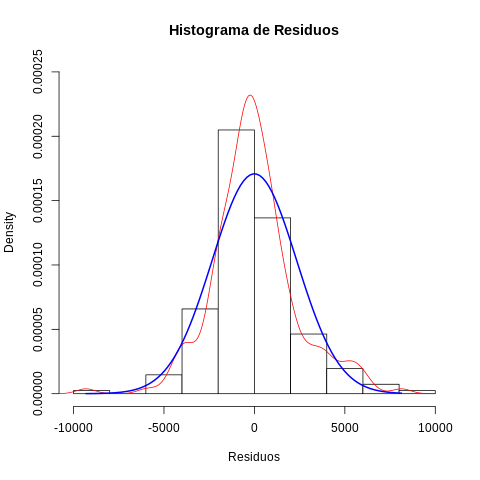

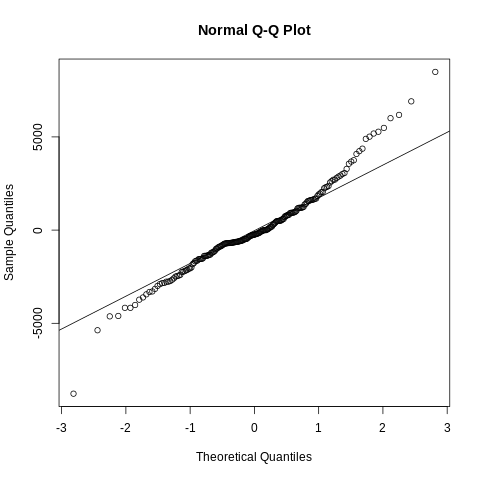

In [135]:
%%R
# Histograma de residuos
hist(R$residuals, freq=FALSE, ylim = c(0, 0.00025), main="Histograma de Residuos", xlab="Residuos", col=0)
lines(density(A$residuals),col="red")
curve(dnorm(x,mean=mean(A$residuals),sd=sd(A$residuals)), from=min(A$residuals),
to=max(A$residuals), add=TRUE, col="blue",lwd=2)

# QQ plot de residuos
qqnorm(R$residuals)
qqline(R$residuals)

Por lo visto en las gráficas, no existe una mejora significativa con respecto a la QQPlot o el histograma mostrados, y si ha de existir algún tipo de cambio sería mínimo. El QQPlot sigue sin adaptarse a la línea recta diagonal del todo, a pesar de que en cierto punto logra de alguna manera acoplarse a la normalidad, los extremos siguen muy desfasados con respecto a la pendiente, por lo que no se logra una distribución normal de forma correcta.

### **Homocedasticidad**
La gráfica de dispersión demuestra poca variación con respecto a la del modelo original. Es cierto que existe cierto cambo con respecto al comportamiento de los residuos de la anterior gráfica a la generada considerando una transformación de datos, aún así no logra una distribución uniforme alrededor de la línea horizontal y persiste en formar una figura en forma de cono o embudo, por ende, se puede concluir que existe mayor variabilidad en los valores más altos de la variable precio/*price* estimado.

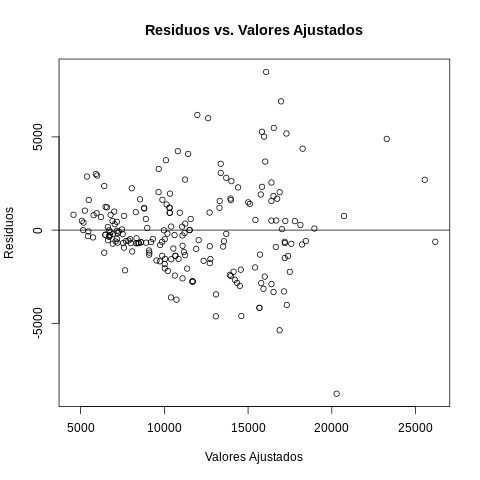

In [84]:
%%R
# Scatterplot de residuals vs. fitted values
plot(R$fitted.values, R$residuals, main="Residuos vs. Valores Ajustados", xlab="Valores Ajustados", ylab="Residuos")
abline(h=0, color="blue")

## **Conclusiones**
Al eliminar las variables que no poseían una significancia estadística lo suficientemente fuerte con respecto a la variable "price" los resultados parecen ser bastante similares a los obtenidos previamente. Sin embargo, podemos comparar valores como el de AIC, que a pesar de tener un valor alto de por si, este era menor en comparación al modelo que solo conserva algunas de las variables destacadas previamente, lo que lo vuelve menos preciso y adaptable en ese aspecto. Al perder tantas variables, el modelo se volvió algo escaso y propenso a la inestabilidad. Puede que con menos cantidad de datos, el modelo sea más comprensible, aún así, sacrificar estos datos puede afectar significativamente el rendimiento del modelo para la estimación de datos.

En realidad y hasta el momento, tengo mis dudas acerca de los datos y sus relaciones con respecto a la variable "price". A pesar de haber filtrado, cambiado y revisado los datos de cada una de las variables, estoy dudando un poco acerca de su compatibilidad con "price", ya que realicé varias modificaciones al modelo y ninguno de los cambios que realicé a los parámetros o variables hasta el momento ha mostrado un cambio significativo tanto en los valores p, valores t, R^2 y error estándar como en las mismas gráficas QQPlot, histogramas o gráficas de dispersión, parece ser que los datos residuo no se comportan de una forma distinta. Dentro de los histogramas aparenta tener cierta normalidad, que por falta de tiempo no pude corroborar con alguna prueba pero planeo hacerlo, y si observamos la QQPlot o bien la gráfica de dispersión nos daremos cuenta de que no se están comportando como uan normal. Quiero dejar en claro que me encuentro con un tiempo muy limitado para seguir realizando pruebas con el fin de encontrar la normalidad de los datos, probar otras herramientas estadísticas que me describan mejor su comportamiento y volver a analizar los datos obtenidos para saber por dónde empezar a corregir este entregable. Espero que para la entrega final, ya teniendo la retroaliemntación por parte de la profesora, me sea más fácil conseguir los resultados que espero obtener.